<a href="https://colab.research.google.com/github/nabilamumtaz/final-projek/blob/main/Final_Projek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install catboost


In [ ]:
# Step 1: Load dataset
file_path = '/content/loan_data_2007_2014 (1).csv'  # Replace with the correct file path
print("Loading Dataset...")
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip', low_memory=False)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Loading Dataset...
Dataset loaded: 6981 rows, 75 columns


In [ ]:
print("\nDataset Overview:")
print(df.head())


Dataset Overview:
   Unnamed: 0       id member_id loan_amnt funded_amnt funded_amnt_inv  \
0           0  1077501   1296599      5000        5000          4975.0   
1           1  1077430   1314167      2500        2500          2500.0   
2           2  1077175   1313524      2400        2400          2400.0   
3           3  1076863   1277178     10000       10000         10000.0   
4           4  1075358   1311748      3000        3000          3000.0   

         term int_rate installment grade  ... total_bal_il il_util  \
0   36 months    10.65      162.87     B  ...          NaN     NaN   
1   60 months    15.27       59.83     C  ...          NaN     NaN   
2   36 months    15.96       84.33     C  ...          NaN     NaN   
3   36 months    13.49      339.31     C  ...          NaN     NaN   
4   60 months    12.69       67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN    

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6981 entries, 0 to 6980
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6981 non-null   int64  
 1   id                           6981 non-null   int64  
 2   member_id                    6981 non-null   object 
 3   loan_amnt                    6981 non-null   object 
 4   funded_amnt                  6981 non-null   object 
 5   funded_amnt_inv              6981 non-null   object 
 6   term                         6980 non-null   object 
 7   int_rate                     6980 non-null   object 
 8   installment                  6980 non-null   object 
 9   grade                        6980 non-null   object 
 10  sub_grade                    6980 non-null   object 
 11  emp_title                    6516 non-null   object 
 12  emp_length                   6731 non-null   object 
 13  hom

In [ ]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
term                   1
int_rate               1
installment            1
grade                  1
sub_grade              1
                    ... 
all_util            6981
total_rev_hi_lim    6981
inq_fi              6981
total_cu_tl         6981
inq_last_12m        6981
Length: 69, dtype: int64


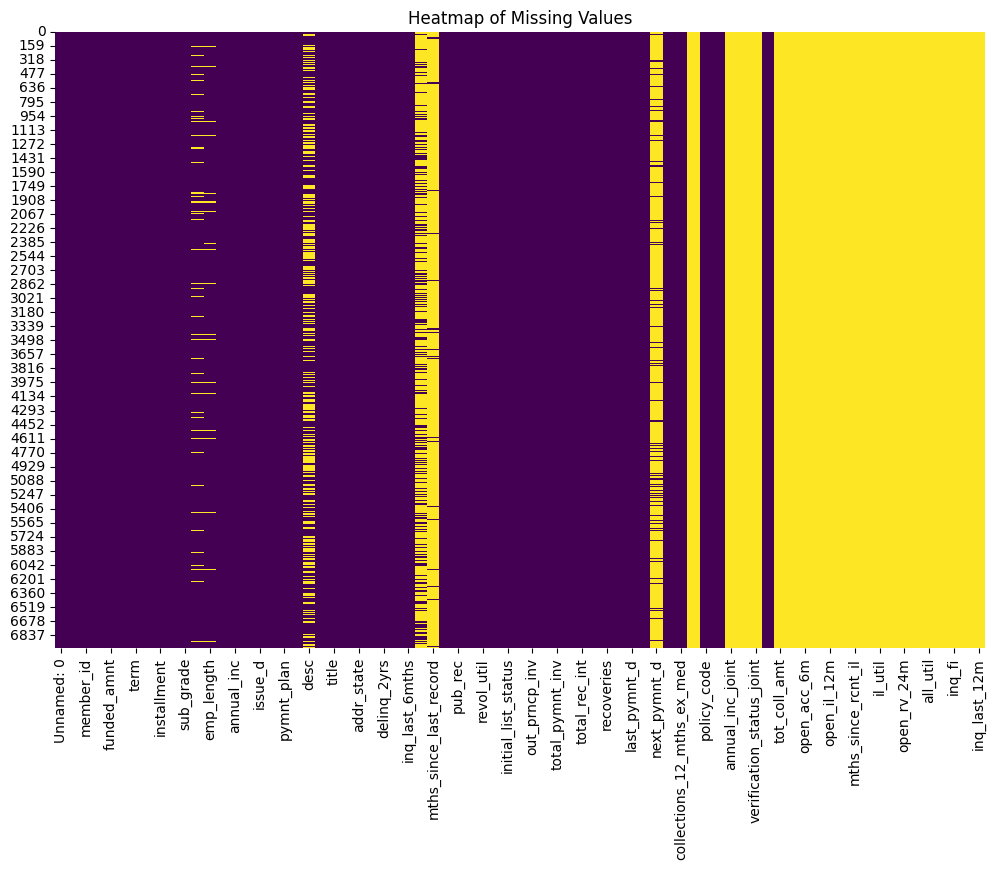

In [ ]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0            id     annual_inc          dti  delinq_2yrs  \
count  6981.000000  6.981000e+03    6980.000000  6980.000000  6980.000000   
mean   3496.991978  1.007260e+06   69047.754805    15.145388     1.115663   
std    2018.642859  4.970872e+04   43530.962782    82.514926    82.424940   
min       0.000000  4.581650e+05       0.000000     0.000000     0.000000   
25%    1745.000000  9.845440e+05   42000.000000     9.137500     0.000000   
50%    3499.000000  1.015178e+06   60000.000000    14.250000     0.000000   
75%    5245.000000  1.043970e+06   83196.250000    19.280000     0.000000   
max    6990.000000  1.077501e+06  725000.000000  6886.330000  6886.330000   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count     6980.000000             2197.000000              275.000000   
mean         0.866953               37.579426               95.178182   
std          1.442187               21.178479               20.508

In [ ]:
# Step 3: Data Cleaning
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'zip_code', 'emp_title',
                   'pymnt_plan', 'application_type', 'policy_code']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
# Handle missing values
threshold = 0.3
print(f"Columns before dropping: {df.shape[1]}")
df = df.dropna(thresh=len(df) * threshold, axis=1)
print(f"Columns after dropping: {df.shape[1]}")
df.fillna(df.median(numeric_only=True), inplace=True)

Columns before dropping: 66
Columns after dropping: 43


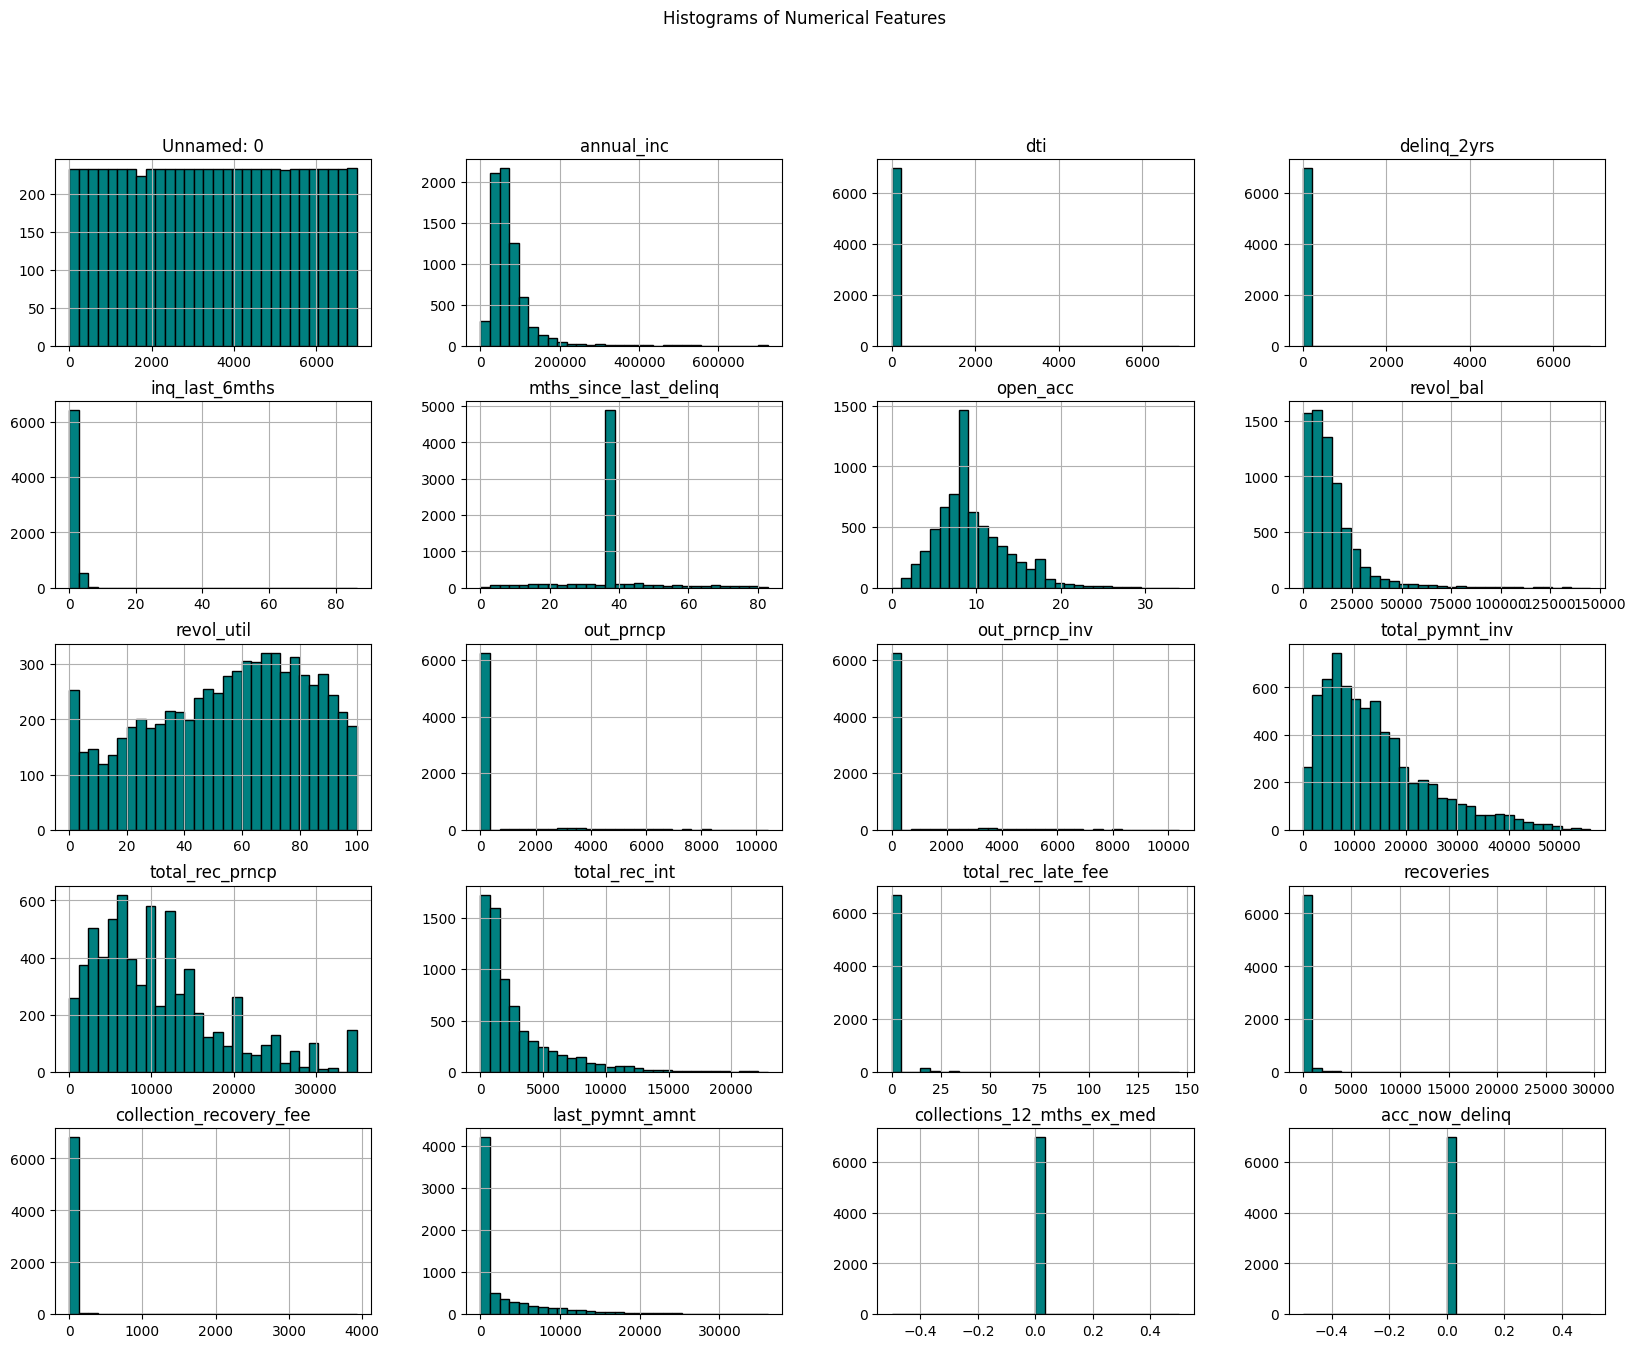

In [ ]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(20, 15), bins=30, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

<ipython-input-50-984aff73d697>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


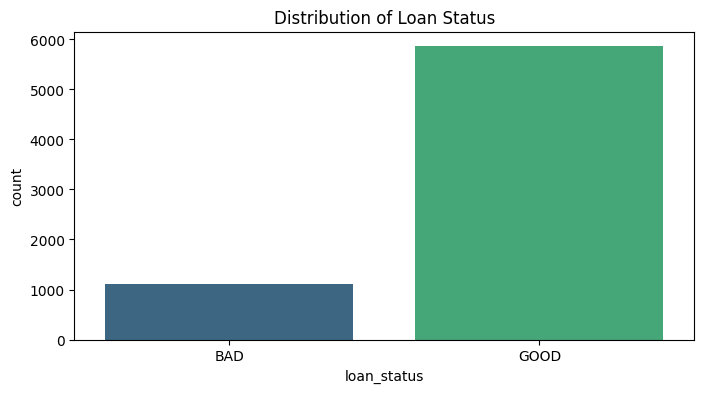

In [ ]:
# Step 4: Define Target Variable
good = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid", "Current", "In Grace Period"]
bad = ["Charged Off", "Late (31-120 days)", "Late (16-30 days)", "Default", "Does not meet the credit policy. Status:Charged Off"]
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x in good else (0 if x in bad else np.nan))
df = df.dropna(subset=['loan_status'])

# Distribution of Target Variable
plt.figure(figsize=(8, 4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title("Distribution of Loan Status")
plt.xticks([0, 1], ['BAD', 'GOOD'])
plt.show()

In [ ]:
# Step 5: Encode Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col].astype(str))

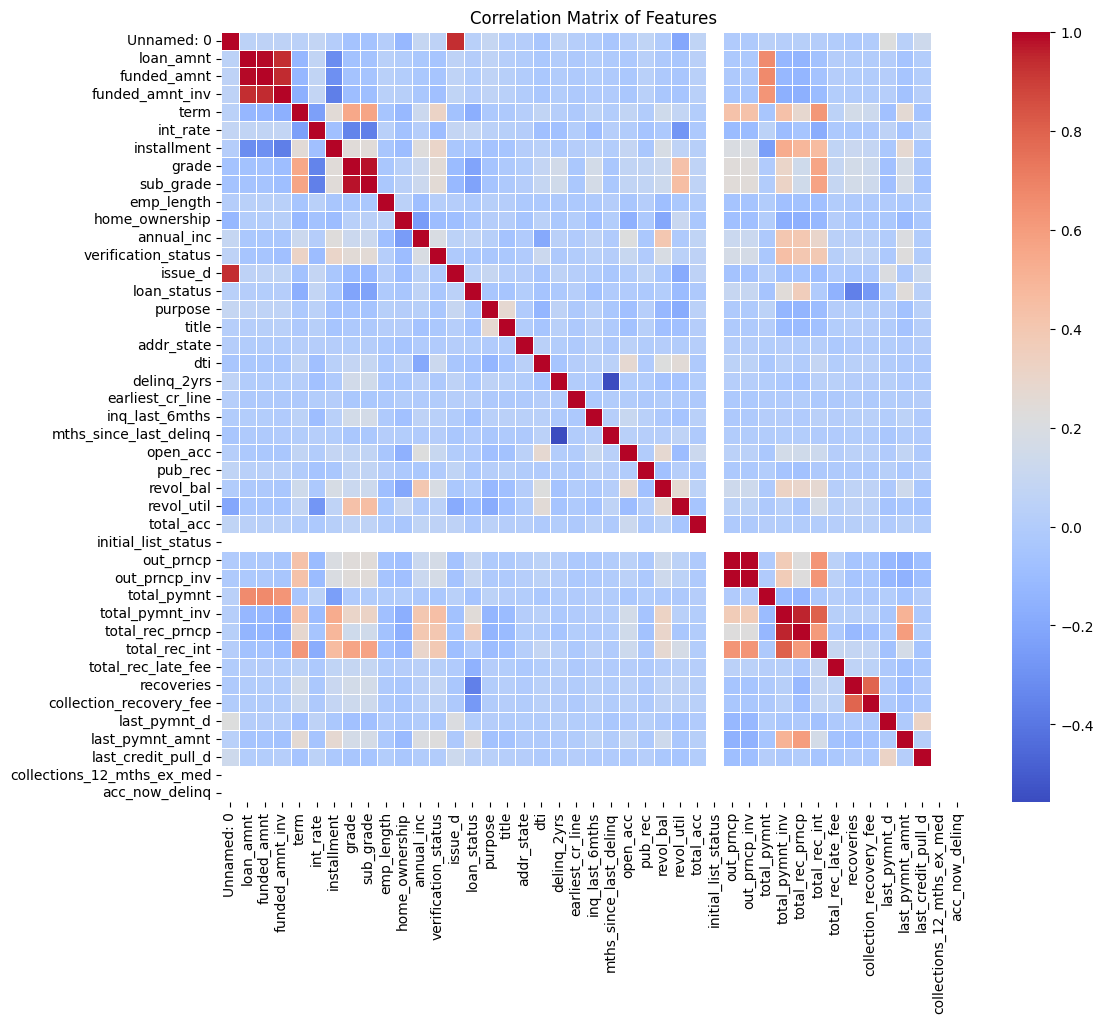

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
# Step 6: Train-Test Split
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Handle Class Imbalance
smote = SMOTE(random_state=42, sampling_strategy=0.7)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, penalty='l2', C=0.01, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42, verbose=0)
}

# Step 7: Cross-Validation and Training
results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    f1_scores = []
    accuracy_scores = []

    for train_index, valid_index in skf.split(X_train_pca, y_train):
        # Train/Validation split
        X_cv_train, X_cv_valid = X_train_pca[train_index], X_train_pca[valid_index]
        y_cv_train, y_cv_valid = y_train[train_index], y_train[valid_index]

        # Train the model
        model.fit(X_cv_train, y_cv_train)

        # Predict on validation set
        y_cv_pred = model.predict(X_cv_valid)

        # Metrics
        f1_scores.append(f1_score(y_cv_valid, y_cv_pred))
        accuracy_scores.append(accuracy_score(y_cv_valid, y_cv_pred))

    # Print Cross-Validation Results
    print(f"{model_name} Cross-Validation F1-Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")



Training Logistic Regression...
Logistic Regression Cross-Validation F1-Score: 0.91 ± 0.00
Logistic Regression Cross-Validation Accuracy: 0.90 ± 0.01

Training Random Forest...
Random Forest Cross-Validation F1-Score: 0.88 ± 0.01
Random Forest Cross-Validation Accuracy: 0.85 ± 0.01

Training Gradient Boosting...
Gradient Boosting Cross-Validation F1-Score: 0.91 ± 0.01
Gradient Boosting Cross-Validation Accuracy: 0.89 ± 0.01

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation F1-Score: 0.91 ± 0.01
XGBoost Cross-Validation Accuracy: 0.89 ± 0.01

Training CatBoost...
CatBoost Cross-Validation F1-Score: 0.90 ± 0.00
CatBoost Cross-Validation Accuracy: 0.88 ± 0.01


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Logistic Regression Test Results ===
Accuracy: 0.90
F1-Score: 0.94
Classification Report:
              precision    recall  f1-score      support
0.0            0.643636  0.790179  0.709419   224.000000
1.0            0.958073  0.916382  0.936764  1172.000000
accuracy       0.896132  0.896132  0.896132     0.896132
macro avg      0.800855  0.853280  0.823091  1396.000000
weighted avg   0.907619  0.896132  0.900285  1396.000000


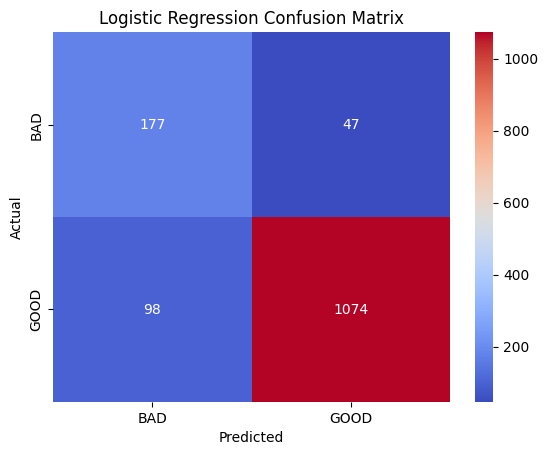


=== Random Forest Test Results ===
Accuracy: 0.88
F1-Score: 0.93
Classification Report:
              precision    recall  f1-score      support
0.0            0.635135  0.629464  0.632287   224.000000
1.0            0.929302  0.930887  0.930094  1172.000000
accuracy       0.882521  0.882521  0.882521     0.882521
macro avg      0.782218  0.780176  0.781190  1396.000000
weighted avg   0.882100  0.882521  0.882308  1396.000000


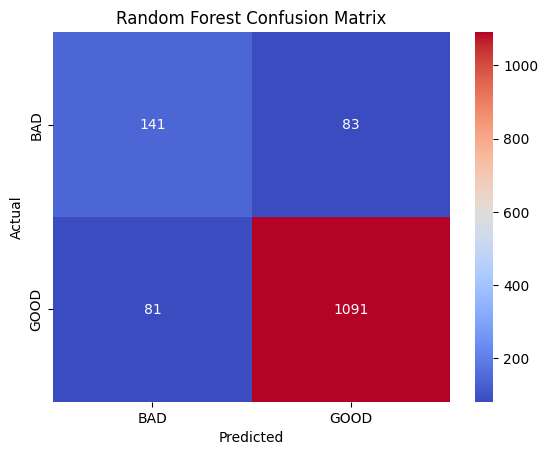


=== Gradient Boosting Test Results ===
Accuracy: 0.89
F1-Score: 0.94
Classification Report:
              precision    recall  f1-score      support
0.0            0.661017  0.696429  0.678261   224.000000
1.0            0.941379  0.931741  0.936535  1172.000000
accuracy       0.893983  0.893983  0.893983     0.893983
macro avg      0.801198  0.814085  0.807398  1396.000000
weighted avg   0.896393  0.893983  0.895093  1396.000000


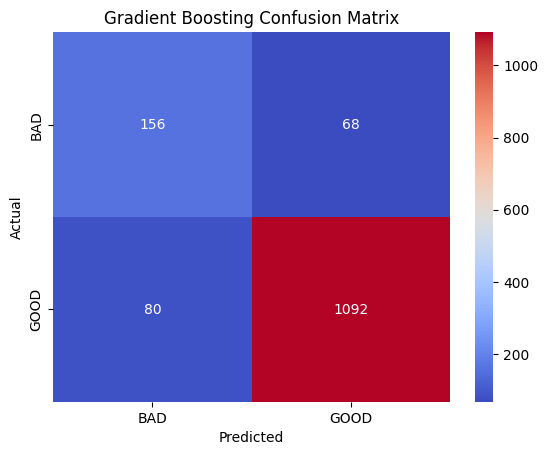


=== XGBoost Test Results ===
Accuracy: 0.89
F1-Score: 0.93
Classification Report:
              precision    recall  f1-score      support
0.0            0.647303  0.696429  0.670968   224.000000
1.0            0.941126  0.927474  0.934250  1172.000000
accuracy       0.890401  0.890401  0.890401     0.890401
macro avg      0.794214  0.811951  0.802609  1396.000000
weighted avg   0.893979  0.890401  0.892004  1396.000000


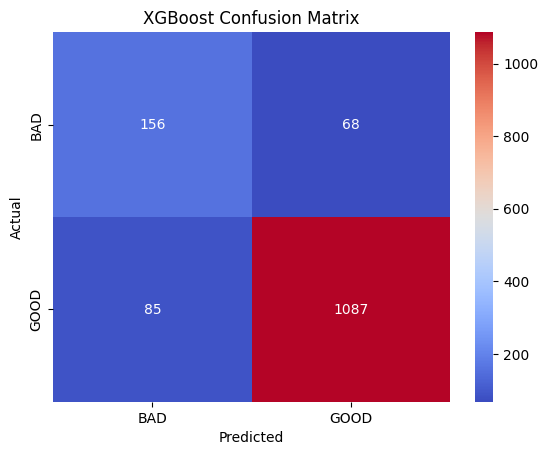


=== CatBoost Test Results ===
Accuracy: 0.89
F1-Score: 0.93
Classification Report:
              precision    recall  f1-score      support
0.0            0.628458  0.709821  0.666667   224.000000
1.0            0.943132  0.919795  0.931317  1172.000000
accuracy       0.886103  0.886103  0.886103     0.886103
macro avg      0.785795  0.814808  0.798992  1396.000000
weighted avg   0.892640  0.886103  0.888852  1396.000000


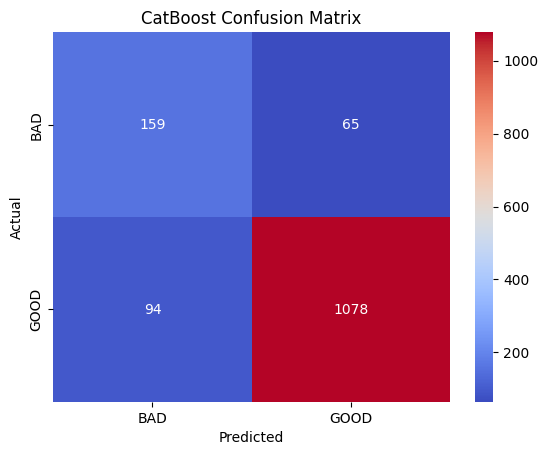

In [ ]:
# Train on full data and evaluate on test set
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    results[model_name] = {
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1-Score": f1_score(y_test, y_test_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
        "Classification Report": classification_report(y_test, y_test_pred, output_dict=True)
    }

# Step 8: Display Test Results
for model_name, result in results.items():
    print(f"\n=== {model_name} Test Results ===")
    print(f"Accuracy: {result['Test Accuracy']:.2f}")
    print(f"F1-Score: {result['Test F1-Score']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(result["Classification Report"]).transpose())
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="coolwarm", xticklabels=["BAD", "GOOD"], yticklabels=["BAD", "GOOD"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
